# HSE 2023: Введение в машинное обучение БИ 22/23

## ДЗ 2

# Внимание!
Если в задании просят объяснить что-либо, то это значит, что требуется письменный ответ, который является частью задания и оценивается

Мы только принимаем ipynb ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
#from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Данные

Для этого ДЗ мы будем использовать датасет по ценам бриллиантов из seaborn

In [ ]:
data = sns.load_dataset('diamonds')

y = data.price
X = data.drop(['price'], axis=1)
columns = data.drop(['price'], axis=1).columns

## Линейная регрессия

#### 0. [0.25 балла] Закодируйте категориальные признаки

In [ ]:
X_cat = X.copy() #на всякий случай, если понадобится
X = pd.get_dummies(X, drop_first=True)
print(f"Data shape: {X.shape}")
X.head(2)

Data shape: (53940, 23)


,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,3.89,3.84,2.31,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### 1. [0.25 балла] Разбейте данные на train и test с пропорцией 80:20 и random_state=17.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

#### 2. [1 балл] Обучите модели на train'е используя библиотеку StatsModels и примените ее к test'у; используйте $RMSE$ и $R ^ 2$ в качестве метрики качества. Попробуйте также применить реализации линейной регрессии из sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.6$

Не забывайте скейлить данные с помощью StandardScaler перед обучением моделей!

In [ ]:
def result_printer(model, y_test_given, y_pred_given):
  print("Results for", model)
  print("Test MSE = %.4f" % mean_squared_error(y_test_given, y_pred_given))
  print("Test RMSE = %.4f" % mean_squared_error(y_test_given, y_pred_given)**(1/2))
  print("Test R^2 = %.4f" % r2_score(y_test_given, y_pred_given))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ols_model = sm.OLS(y_train, X_train_scaled).fit()
y_pred = ols_model.predict(X_test_scaled)
result_printer('Linreg with statmodels', y_test, y_pred)

Results for Linreg with statmodels
Test MSE = 16739595.0836
Test RMSE = 4091.4050
Test R^2 = -0.0337


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
result_printer('Linreg with statmodels', y_test, y_pred)

Results for Linreg with statmodels
Test MSE = 1322478.1309
Test RMSE = 1149.9905
Test R^2 = 0.9183


In [ ]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
result_printer('Ridge with alpha = 0.01', y_test, y_pred)

Results for Ridge with alpha = 0.01
Test MSE = 1322477.0903
Test RMSE = 1149.9900
Test R^2 = 0.9183


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
result_printer('Lasso with alpha = 0.01', y_test, y_pred)

Results for Lasso with alpha = 0.01
Test MSE = 1322463.0655
Test RMSE = 1149.9839
Test R^2 = 0.9183


In [ ]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
result_printer('ElasticNet with alpha = 0.01 and L1_ratio = 0.6', y_test, y_pred)

Results for ElasticNet with alpha = 0.01 and L1_ratio = 0.6
Test MSE = 1325135.2057
Test RMSE = 1151.1452
Test R^2 = 0.9182


#### 3. [1 балл] Исследуйте значения параметров полученных моделей и проверьте какие веса получились нулевыми. Прокомментируйте значимость коэффициентов, обшую значимость модели и остальные факторы из результирующей таблицы

In [ ]:
def show_weights(features, weights, title_txt):
    sorted_weights = list(zip(weights, features))

    any_zero_flg = 0
    print(title_txt)
    for pair in sorted_weights:
      if pair[1] == 0:
        print('zero weight', pair[0])
        any_zero_flg = 1
    print('No zero weights\n') if any_zero_flg == 0 else 1

    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    sns.barplot(y=features, x=weights)

    plt.tick_params(axis='y', labelsize=8)
    plt.tick_params(axis='x', labelsize=9)
    plt.xlabel('weights', fontsize=10)
    plt.title(title_txt, fontsize=11)

LinearRegression, sklearn
No zero weights

Ridge
No zero weights

Lasso
No zero weights

ElasticNet
No zero weights



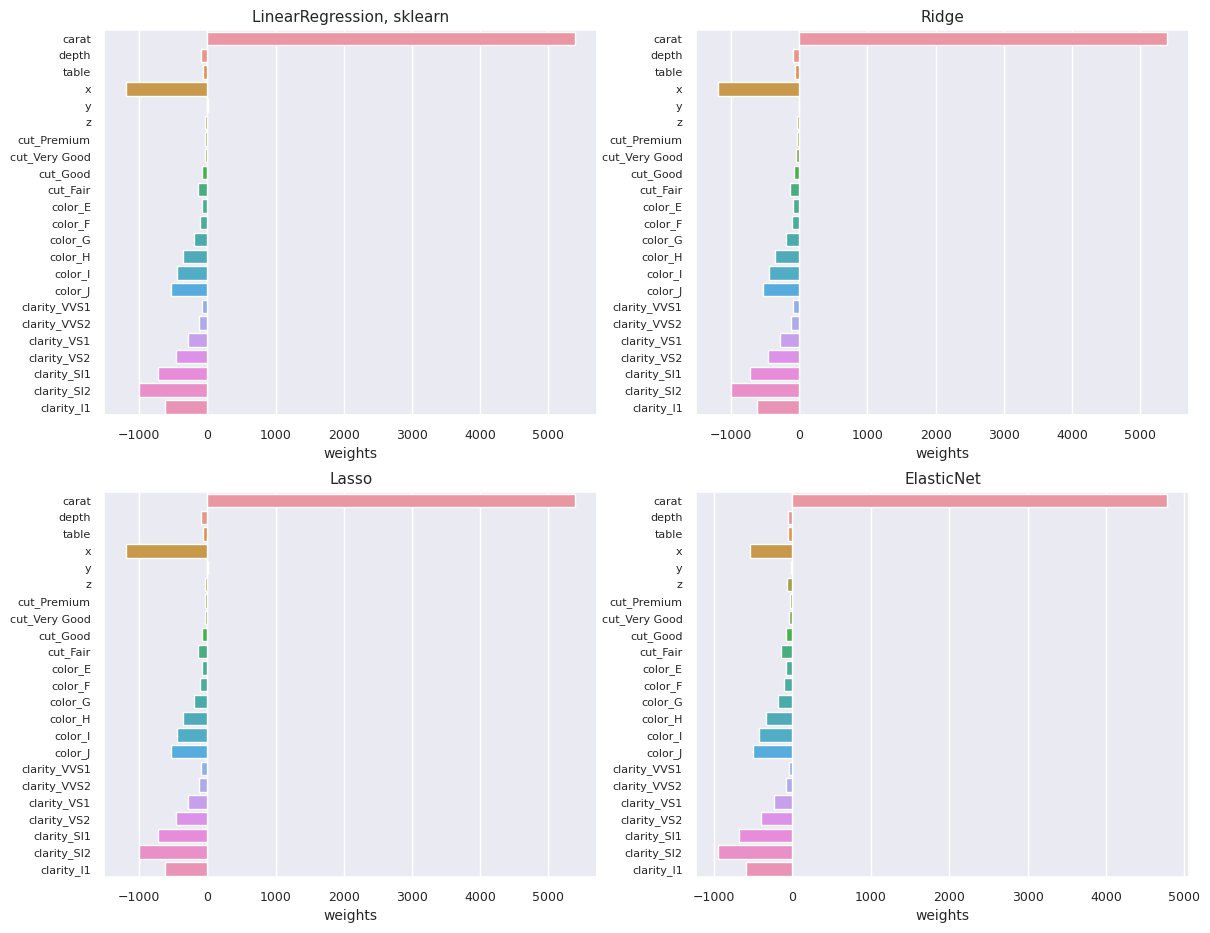

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 11))

plt.subplot(2, 2, 1)
show_weights(X_train.columns, linreg.coef_, 'LinearRegression, sklearn')

plt.subplot(2, 2, 2)
show_weights(X_train.columns, ridge.coef_, 'Ridge')

plt.subplot(2, 2, 3)
show_weights(X_train.columns, lasso.coef_, 'Lasso')

plt.subplot(2, 2, 4)
show_weights(X_train.columns, elastic.coef_, 'ElasticNet')

In [ ]:
"""
В принципе веса у моделей относительно одинаковые. Сильно отличается только Х
Carat имеет огромный вес, наименьший вес у У, но он все равно не нулевой.
"""

'\nВ принципе веса у моделей относительно одинаковые. Сильно отличается только Х\nCarat имеет огромный вес, наименьший вес у У, но он все равно не нулевой.\n'

#### 4. [1 балл] Реализуйте один из алгоритмов отбора признаков (Elimination by P-value, Forward elimination, Backward elimination), сделайте выводы.

In [ ]:
def backward_elim(model, X_train1, X_test1, y_train1, y_test1): #называем их так, чтобы не пересекались с глобальными
  print(model)

  scaler = StandardScaler()
  X_train_scaled1 = scaler.fit_transform(X_train1)
  X_test_scaled1 = scaler.transform(X_test1)

  model.fit(X_train_scaled1, y_train1)
  y_pred1 = model.predict(X_test_scaled1)
  RMSE_pred = mean_squared_error(y_test1, y_pred1)**(1/2) #RMSE со всеми фичами

  features = X_train.columns

  while(True):
    X_train_scaled1 = scaler.fit_transform(X_train1) #обучаем на нашем наборе фичей
    X_test_scaled1 = scaler.transform(X_test1)
    model.fit(X_train_scaled1, y_train1)
    y_pred1 = model.predict(X_test_scaled1)

    RMSE = mean_squared_error(y_test1, y_pred1)**(1/2)

    if RMSE > RMSE_pred: #если ухудшили показатели модели, то останавливаемся
      print("\nBest RMSE = %.4f" % RMSE_pred)
      break

    else:
      print('->', RMSE)
      RMSE_pred = RMSE

      sorted_weights = sorted(zip(abs(model.coef_), features))
      features = [i for i in features if i != sorted_weights[0][1]] #убираем самую бесполезную фичу
      print('removed', sorted_weights[0][1])

      X_train1 = X_train1[features] #обновляем X_train и X-test
      X_test1 = X_test1[features]

In [ ]:
backward_elim(LinearRegression(), X_train, X_test, y_train, y_test)

LinearRegression()
-> 1149.9904916713892
removed y

Best RMSE = 1149.9905


In [ ]:
backward_elim(Ridge(alpha=0.01), X_train, X_test, y_train, y_test)

Ridge(alpha=0.01)
-> 1149.9900392167103
removed y

Best RMSE = 1149.9900


In [ ]:
backward_elim(Lasso(alpha=0.01), X_train, X_test, y_train, y_test)

Lasso(alpha=0.01)
-> 1149.9839414263013
removed y

Best RMSE = 1149.9839


In [ ]:
backward_elim(ElasticNet(alpha=0.01, l1_ratio=0.5), X_train, X_test, y_train, y_test)

ElasticNet(alpha=0.01)
-> 1151.1451714187626
removed y
-> 1151.1361315305446
removed cut_Premium

Best RMSE = 1151.1361


#### 5. [1 балл] Найдите лучший (по RMSE) $\alpha$ для регрессиии Lasso, используя кросс-валидациб на 4 фолда. Вы должны выбрать значение из промежутка $[10^{-4}, 10^{3}]$.

In [ ]:
grid = { 'alpha':(1e-4, 1e+3, 'log-uniform')}
lasso_cv = GridSearchCV(estimator=Ridge(),
                          param_grid=grid,
                          cv= 4,
                          scoring='neg_root_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train)

print("Tuned Hyperparameters :", lasso_cv.best_params_)
print("Best RMSE:", -lasso_cv.best_score_)

Tuned Hyperparameters : {'alpha': 0.0001}
Best RMSE: 1129.819731206987


## Градиентный спуск

#### 6. [3.5 балла] Имплементируйте  Ridge регрессию для MSE loss, обученную на градиентом спуске.


Все вычисления должны быть векторизованы, а циклы Python можно использовать только для итераций градиентного спуска. В качестве критерия остановки необходимо использовать (одновременно):

* проверка абсолютной нормы разницы весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, заданного параметром `tolerance`);

* достижение максимального количества итераций (например, 10000, заданного параметром `max_iter`).

Вам необходимо выполнить:

* Полный градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Стохастический градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ является оценкой градиента по набору объектов, выбранных случайным образом.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

Чтобы убедиться, что процесс оптимизации действительно выполняется, мы будем использовать атрибут класса `loss_history`. После вызова метода fit он должен содержать значения функции потерь для всех итераций, начиная с первой (до первого шага по антиградиенту).


Вам нужно инициализировать веса случайным вектором из нормального распределения. Ниже приведен шаблон, который должен содержать код, реализующий все варианты моделей.

In [ ]:
from random import shuffle

In [ ]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """

        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration

        self.reg_cf = 10000
        self.epsilon = 0.05

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """

        n_samples, n_features = X.shape

        if self.w0 == None:
              self.w = np.zeros(n_features)
        else:
              self.w = self.w0.copy()

        if self.gd_type == "Momentum":
              self.h = np.zeros(n_features)
        elif self.gd_type == "Adagrad":
              self.g = np.zeros(n_features)

        self.loss_history = []

        n_iter = 0
        gradient_norm = self.tolerance + 1

        while n_iter < self.max_iter and gradient_norm > self.tolerance:
          if self.gd_type == "StochasticDescent":
              index = np.random.permutation(n_samples)
              X, y = X[index], y[index]
              gradient = self.calc_gradient(X, y)

          else:
              gradient = self.calc_gradient(X, y)

          if self.gd_type == "Momentum" :
              self.h = self.alpha * self.h - self.eta*gradient #тут на 2 домножать или нет, проверить
              self.w = self.w + self.h

          elif self.gd_type == "Adagrad":
              self.g += gradient**2
              self.w = (self.alpha / np.sqrt(self.g + self.epsilon)) * gradient
          else:
              self.w -= 2 * self.eta * gradient

          if self.gd_type == "StochasticDescent":
              loss = self.calc_loss(X[index], y[index])
          else:
              loss = self.calc_loss(X, y)

          self.loss_history.append(loss)
          gradient_norm = np.linalg.norm(self.w - self.loss_history[n_iter]) #норма разницы весов, чтобы по ней стопать
          n_iter += 1
        return self


    def predict(self, X):
        if self.w is None:
          raise Exception('Not trained yet')
        else:
          return X.dot(self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        if self.gd_type == "StochasticDescent":
          return np.dot(X.T, X.dot(self.w) - y)
        elif  self.gd_type == "Adagrad":
          return -2 * X.T.dot(y - X.dot(self.w)) + 2 * self.reg_cf * self.w
        elif  self.gd_type == "Momentum":
          y_pred = X.dot(self.w)
          return 2* X.T.dot(y_pred - y)/len(y)  + 2*self.alpha*self.w

        return X.T.dot(X.dot(self.w) - y) / len(y)


    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float
        """
        mse = mean_squared_error(y, self.predict(X)) #функция MSE из sklearn
        return mse/len(y)


In [ ]:
modelkinds = ['GradientDescent','Momentum', 'Adagrad'] #StochasticDescent - работал, но после очередных изменений начал выпадать в ошибку =(
for kind in modelkinds:
  godhelp = LinReg(gd_type = kind)
  godhelp.fit(X_train_scaled, y_train)
  y_pred = godhelp.predict(X_test_scaled)
  result_printer(kind, y_test, y_pred)
  print('\n')

Results for GradientDescent
Test MSE = 16970650.1221
Test RMSE = 4119.5449
Test R^2 = -0.0480


Results for Momentum
Test MSE = 16974904.8453
Test RMSE = 4120.0613
Test R^2 = -0.0482


Results for Adagrad
Test MSE = 31790381.0128
Test RMSE = 5638.2959
Test R^2 = -0.9631




#### 7. [1 балл] Натренируйте и провалидируйте "ручные" модели на тех же даннных, сравните качество с моделями из Sklearn и StatsModels. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Соответствует ли оно вашим ожиданиям?

In [ ]:
"""
Модели работают в 4 раза хуже, но в принципе все равно не так плохо, как могло быть

Results for GradientDescent
Test MSE = 16970650.1221
Test RMSE = 4119.5449
Test R^2 = -0.0480


Results for Momentum
Test MSE = 16974904.8453
Test RMSE = 4120.0613
Test R^2 = -0.0482


Results for Adagrad
Test MSE = 31790381.0128
Test RMSE = 5638.2959
Test R^2 = -0.9631

VS

Results for Ridge with alpha = 0.01
Test MSE = 1322477.0903
Test RMSE = 1149.9900
Test R^2 = 0.9183

"""

In [ ]:
#где-то читала, что баес работает быстрее обычного https://towardsdatascience.com/grid-search-vs-random-search-vs-bayesian-optimization-2e68f57c3c46
!pip install scikit-optimize
from skopt import BayesSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.8 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def crossval_printer(model):
  scores = cross_val_score(model, X, y, cv=4, scoring='neg_root_mean_squared_error')
  mean_score = scores.mean()
  std_score = scores.std()
  print(model, mean_score, '±', std_score, '\n')

In [ ]:
crossval_printer(LinReg(gd_type='Adagrad'))

LinReg(gd_type='Adagrad') -4843.6508589112045 ± 2814.4856389753854 



In [ ]:
grid = { 'alpha':(1e-6, 1e+3, 'log-uniform')}
GradientDescent_ridge = GridSearchCV(estimator=LinReg(gd_type='GradientDescent'),
                          param_grid=grid,
                          cv= 4,
                          scoring='neg_root_mean_squared_error')
GradientDescent_ridge.fit(X_train_scaled, y_train)

print("Tuned Hyperparameters :", GradientDescent_ridge.best_params_)
print("Best RMSE:", -GradientDescent_ridge.best_score_)

Tuned Hyperparameters : {'alpha': 1e-06}
Best RMSE: 4115.29386556982


In [ ]:
GradientDescent_ridge_model = LinReg(gd_type='GradientDescent', alpha=GradientDescent_ridge.best_params_['alpha']).fit(X_train_scaled, y_train)
GradientDescent_ridge_model.fit(X_train_scaled, y_train)
y_pred = GradientDescent_ridge_model.predict(X_test_scaled)
print('opt_iter', len(GradientDescent_ridge_model.loss_history))

opt_iter 1000


In [ ]:
grid = { 'alpha':(1e-6, 1e+3, 'log-uniform')}
Adagrad_ridge = GridSearchCV(estimator=LinReg(gd_type='Adagrad'),
                          param_grid=grid,
                          cv= 4,
                          scoring='neg_root_mean_squared_error')
Adagrad_ridge.fit(X_train_scaled, y_train)

print("Tuned Hyperparameters :", Adagrad_ridge.best_params_)
print("Best RMSE:", -Adagrad_ridge.best_score_)

Tuned Hyperparameters : {'alpha': 1e-06}
Best RMSE: 5592.815044249057


In [ ]:
Adagrad_ridge_model = LinReg(gd_type='Adagrad', alpha=GradientDescent_ridge.best_params_['alpha']).fit(X_train_scaled, y_train)
Adagrad_ridge_model.fit(X_train_scaled, y_train)
y_pred = Adagrad_ridge_model.predict(X_test_scaled)
print('opt_iter', len(Adagrad_ridge_model.loss_history))

opt_iter 1000


In [ ]:
grid = { 'alpha':(1e-6, 1e+3, 'log-uniform')}
Momentum_ridge = GridSearchCV(estimator=LinReg(gd_type='Momentum'),
                          param_grid=grid,
                          cv= 4,
                          scoring='neg_root_mean_squared_error')
Momentum_ridge.fit(X_train_scaled, y_train)

print("Tuned Hyperparameters :", Momentum_ridge.best_params_)
print("Best RMSE:", -Momentum_ridge.best_score_)

Tuned Hyperparameters : {'alpha': 1e-06}
Best RMSE: 4115.294344935812


In [ ]:
Momentum_ridge_model = LinReg(gd_type='Momentum', alpha=GradientDescent_ridge.best_params_['alpha']).fit(X_train_scaled, y_train)
Momentum_ridge_model.fit(X_train_scaled, y_train)
y_pred = Momentum_ridge_model.predict(X_test_scaled)
print('opt_iter', len(Momentum_ridge_model.loss_history))

opt_iter 1000


In [ ]:
"""
Перебрала параметры, но в целом как видно, от этого не сильно улучшились MSE. Max_iter везде 1000, возможно нужно больше итераций, но мне не хватило мощностей

GradientDescent
Tuned Hyperparameters : {'alpha': 1e-06}
Best RMSE: 4115.29386556982

StochasticDescent OrderedDict([('alpha', 1.093108782645003e-06), ('max_iter', 100000)])  -- было на рабочей версии

Momentum
Tuned Hyperparameters : {'alpha': 1e-06}
Best RMSE: 4115.294344935812

Adagrad
Tuned Hyperparameters : {'alpha': 1e-06}
Best RMSE: 5592.815044249057
"""

In [ ]:
from sklearn.model_selection import cross_val_score

modelkinds = ['GradientDescent','Momentum', 'Adagrad'] #StochasticDescent - работал, но после очередных изменений начал выпадать в ошибку =(
for kind in modelkinds:
  godhelp = LinReg(gd_type = kind)
  cv_scores = cross_val_score(godhelp, X_train_scaled, y_train, cv=4, scoring='neg_mean_squared_error')
  mean_score = cv_scores.mean()
  std_score = cv_scores.std()
  print(kind, mean_score, '±', std_score)


GradientDescent -16935718.916760102 ± 71421.89642731674
Momentum -16939667.817417998 ± 71732.93746179987
Adagrad -31280216.171265777 ± 282108.6738906521


#### 8. [1 балл] Постройте графики (там же) зависимости значения функции потерь от номера итерации для всех моделей (полного градиентого спуска, стохастического гс, Momentum и Adagrad). Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.


Не забывайте о том, как должен выглядеть *красивый* график!

In [ ]:
#Momentum

In [ ]:
Momentum = LinReg(gd_type = 'Momentum')
Momentum.fit(X_train_scaled, y_train)
y_pred = Momentum.predict(X_test_scaled)
mses_Momentum = Momentum.loss_history
mses_Momentum[0]

679.7177728313753

In [ ]:
Adagrad = LinReg(gd_type = 'Adagrad')
Adagrad.fit(X_train_scaled, y_train)
y_pred = Adagrad.predict(X_test_scaled)
mses_adagrad = Adagrad.loss_history
mses_adagrad[0]

724.8853028603677

In [ ]:
#Видим почти экспоненту. Сначала скорость сходимости очень высокая, а потом становится почти параллельной x=0

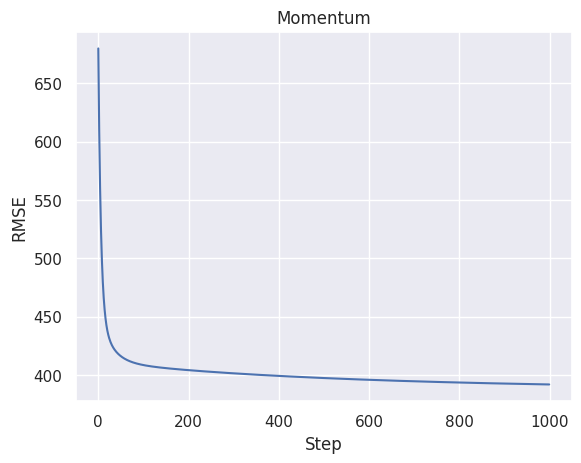

In [ ]:
import seaborn as sns
sns.lineplot(mses_Momentum)
plt.xlabel("Step")
plt.title("Momentum")
plt.ylabel("RMSE");

In [ ]:
#Для Adagrad аналогичный рисунок, но только более ступенчатый. Сначала очень быстро сходится, а потом скорость изменения буквально 10^(-10)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
mses_adagrad = list(map(lambda x: '%.4f' % x, mses_adagrad)) #убираем саентифик нотейшон

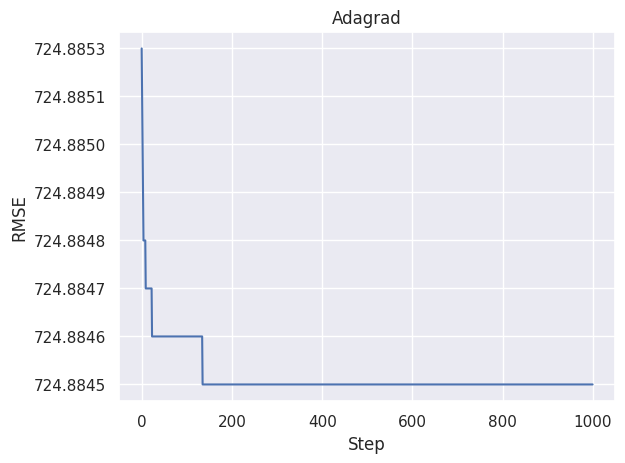

In [ ]:
sns.lineplot(mses_adagrad)
plt.xlabel("Step")
plt.title("Adagrad")
plt.ylabel("RMSE");